In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns




In [37]:
#  Load the Dataset
df = pd.read_csv(r"C:\Users\PREMKUMAR BAJARU\Desktop\Food-and-Restaurant-Data-Analysis-Hackathon\zomato_data.csv")

In [38]:
print(df.head())
print(df.info())
print(df.describe())

  online_order book_table   rate  votes            rest_type  \
0          Yes        Yes  4.1/5    775        Casual Dining   
1          Yes         No  4.1/5    787        Casual Dining   
2          Yes         No  3.8/5    918  Cafe, Casual Dining   
3           No         No  3.7/5     88          Quick Bites   
4           No         No  3.8/5    166        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines approx_costfor_two_people listed_intype  \
0  North Indian, Mughlai, Chinese                       800        Buffet   
1     Chinese, North Indian, Thai                       800        Buffet   
2          Cafe, Mexican, Italian              

In [39]:
df['rate'] = df['rate'].replace(['NEW', '-', 'nan'], np.nan)
df['rate'] = df['rate'].astype(str).str.replace('/5', '').str.strip()
df['rate'] = pd.to_numeric(df['rate'], errors='coerce')
df['rate'] = df['rate'].fillna(df['rate'].median())

In [40]:
print(df.columns)

Index(['online_order', 'book_table', 'rate', 'votes', 'rest_type',
       'dish_liked', 'cuisines', 'approx_costfor_two_people', 'listed_intype',
       'listed_incity'],
      dtype='object')


In [41]:
df.rename(columns={'approx_costfor_two_people': 'cost'}, inplace=True)


In [42]:
df['cost'] = df['cost'].astype(str).str.replace(',', '').str.strip()
df['cost'] = pd.to_numeric(df['cost'], errors='coerce')
df['cost'] = df['cost'].fillna(df['cost'].median())


In [43]:
# Check missing values
df.isnull().sum()


online_order         0
book_table           0
rate                 0
votes                0
rest_type          227
dish_liked       28078
cuisines            45
cost                 0
listed_intype        0
listed_incity        0
dtype: int64

In [44]:
df.dropna(subset=['rest_type', 'cuisines', 'dish_liked'], inplace=True)

In [45]:
df.isnull().sum()


online_order     0
book_table       0
rate             0
votes            0
rest_type        0
dish_liked       0
cuisines         0
cost             0
listed_intype    0
listed_incity    0
dtype: int64

In [46]:
pip install folium


Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: folium in c:\users\premkumar bajaru\appdata\local\packages\pythonsoftwarefoundation.python.3.10_qbz5n2kfra8p0\localcache\local-packages\python310\site-packages (0.19.5)



In [47]:
df['rest_type'].value_counts().head(10)


rest_type
Casual Dining         7424
Quick Bites           5289
Cafe                  2409
Dessert Parlor        1086
Casual Dining, Bar    1008
Delivery               707
Bar                    369
Bar, Casual Dining     361
Takeaway, Delivery     347
Pub                    327
Name: count, dtype: int64

In [48]:
df['online_order'].value_counts()


online_order
Yes    16466
No      7103
Name: count, dtype: int64

In [49]:
df.sort_values(by='rate', ascending=False).head(10)


,online_order,book_table,rate,votes,rest_type,dish_liked,cuisines,cost,listed_intype,listed_incity
9099,Yes,Yes,4.9,2178,"Casual Dining, Bar","Noodles, Chicken Dim Sum, Pad Thai Noodle, Jum...","Asian, Chinese, Thai, Momos",1500.0,Delivery,BTM
6746,No,Yes,4.9,2745,Casual Dining,"Pizza, Mutton Kebab, Chicken Biryani, Sea Food...","Asian, Mediterranean, North Indian, BBQ",1400.0,Buffet,Brookefield
32436,Yes,Yes,4.9,2244,"Casual Dining, Bar","Noodles, Chicken Dim Sum, Pad Thai Noodle, Jum...","Asian, Chinese, Thai, Momos",1500.0,Delivery,Koramangala 6th Block
45812,No,Yes,4.9,246,Casual Dining,"Biryani, Tomato Soup, Farm Pizza, Dumplings, L...","Healthy Food, Salad, Mediterranean",1000.0,Dine-out,Old Airport Road
46253,Yes,Yes,4.9,1973,Casual Dining,"Chicken Malai Tikka, Jalebi Rabri, Lunch Buffe...","North Indian, Mughlai",2000.0,Delivery,Rajajinagar
10879,Yes,Yes,4.9,2178,"Casual Dining, Bar","Noodles, Chicken Dim Sum, Pad Thai Noodle, Jum...","Asian, Chinese, Thai, Momos",1500.0,Dine-out,BTM
26497,Yes,Yes,4.9,2215,"Casual Dining, Bar","Chicken Dim Sum, Pad Thai Noodle, Jumbo Prawns...","Asian, Chinese, Thai, Momos",1500.0,Buffet,Koramangala 4th Block
29271,Yes,Yes,4.9,2235,"Casual Dining, Bar","Noodles, Chicken Dim Sum, Pad Thai Noodle, Jum...","Asian, Chinese, Thai, Momos",1500.0,Buffet,Koramangala 5th Block
21279,No,Yes,4.9,6452,Casual Dining,"Tangdi Chicken, Bbq Buffet, Chocolate Icecream...","European, Mediterranean, North Indian, BBQ",1600.0,Dine-out,Jayanagar
47987,Yes,No,4.9,1749,Dessert Parlor,"Coffee, Berryblast, Nachos, Chocolate Waffles,...",Desserts,400.0,Desserts,Residency Road


In [50]:
df['cost'].describe()


count    23569.000000
mean       753.177479
std        519.426642
min         40.000000
25%        400.000000
50%        600.000000
75%       1000.000000
max       6000.000000
Name: cost, dtype: float64

In [51]:
pip install folium


Note: you may need to restart the kernel to use updated packages.


In [52]:
import folium
from folium.plugins import MarkerCluster


In [53]:
df['listed_incity'].unique()


array(['Banashankari', 'Bannerghatta Road', 'Basavanagudi', 'Bellandur',
       'Brigade Road', 'Brookefield', 'BTM', 'Church Street',
       'Electronic City', 'Frazer Town', 'HSR', 'Indiranagar',
       'Jayanagar', 'JP Nagar', 'Kalyan Nagar', 'Kammanahalli',
       'Koramangala 4th Block', 'Koramangala 5th Block',
       'Koramangala 6th Block', 'Koramangala 7th Block', 'Lavelle Road',
       'Malleshwaram', 'Marathahalli', 'MG Road', 'New BEL Road',
       'Old Airport Road', 'Rajajinagar', 'Residency Road',
       'Sarjapur Road', 'Whitefield'], dtype=object)

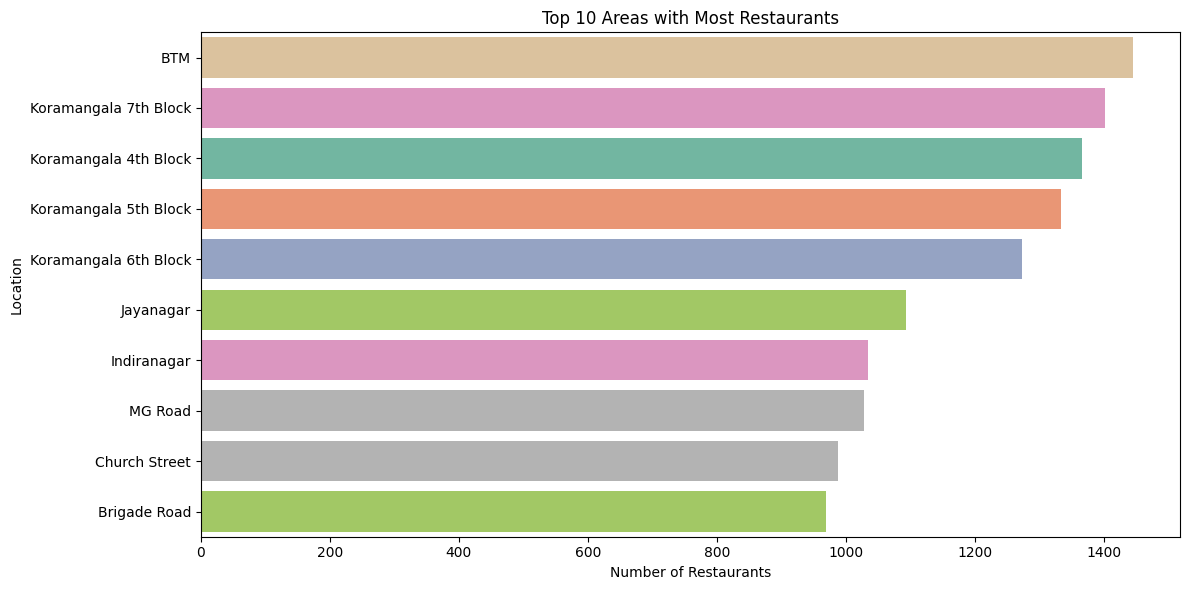

In [54]:
plt.figure(figsize=(12,6))
sns.countplot(
    data=df,
    y='listed_incity',
    hue='listed_incity',
    order=df['listed_incity'].value_counts().head(10).index,
    palette='Set2',
    legend=False  
)
plt.title('Top 10 Areas with Most Restaurants')
plt.xlabel('Number of Restaurants')
plt.ylabel('Location')
plt.tight_layout()
plt.show()


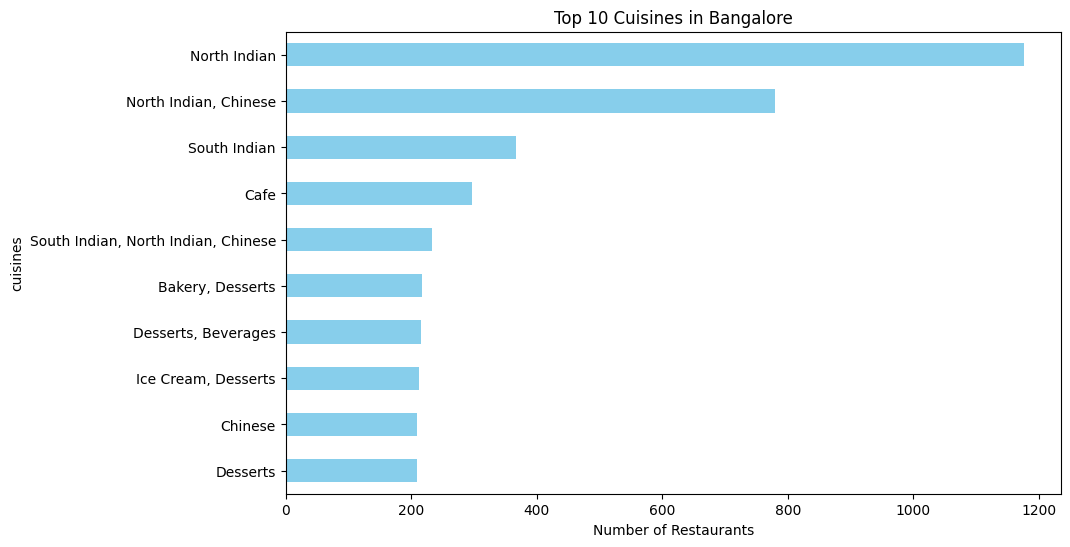

In [55]:
top_cuisines = df['cuisines'].value_counts().head(10)
top_cuisines.plot(kind='barh', color='skyblue', figsize=(10,6), title='Top 10 Cuisines in Bangalore')
plt.xlabel("Number of Restaurants")
plt.gca().invert_yaxis()
plt.show()


In [56]:
geo_df = pd.read_csv(r"C:\Users\PREMKUMAR BAJARU\Desktop\Food-and-Restaurant-Data-Analysis-Hackathon\Geographical Coordinates.csv")
merged_df = pd.merge(df, geo_df, on='listed_incity', how='left')
merged_df.head()

,online_order,book_table,rate,votes,rest_type,dish_liked,cuisines,cost,listed_intype,listed_incity,Latitude,Longitude
0,Yes,Yes,4.1,775,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,Buffet,Banashankari,12.939333,77.553982
1,Yes,No,4.1,787,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,Buffet,Banashankari,12.939333,77.553982
2,Yes,No,3.8,918,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,Buffet,Banashankari,12.939333,77.553982
3,No,No,3.7,88,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,Buffet,Banashankari,12.939333,77.553982
4,No,No,3.8,166,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,Buffet,Banashankari,12.939333,77.553982


In [64]:
merged_df.to_csv("Merged_Zomato_Data.csv", index=False)


In [58]:
from folium.plugins import HeatMap

heat_df = merged_df.dropna(subset=['Latitude', 'Longitude'])

heat_data = [[row['Latitude'], row['Longitude']] for index, row in heat_df.iterrows()]

bangalore_map = folium.Map(location=[12.9716, 77.5946], zoom_start=11)
HeatMap(heat_data, radius=10).add_to(bangalore_map)


In [59]:
italian_df = merged_df[merged_df['cuisines'].str.contains("Italian", na=False)]
italian_map = folium.Map(location=[12.9716, 77.5946], zoom_start=11)
marker_cluster = MarkerCluster().add_to(italian_map)
for index, row in italian_df.iterrows():
    if pd.notnull(row['Latitude']) and pd.notnull(row['Longitude']):
        folium.Marker(
            location=[row['Latitude'], row['Longitude']],
            popup=f"Cuisine: Italian\nRating: {row['rate']}/5",
            tooltip=row['listed_incity']
        ).add_to(marker_cluster)


In [62]:
italian_map.save("Italian_Restaurants_Map.html")
bangalore_map.save("Restaurant_Density_Heatmap.html")


# **MCQ-based Question's Answers**

## **Q1. What is the shape of the given dataset?**

In [ ]:
zomato_data.shape

(51717, 10)

## **Q2. How many restaurants serve North Indian cuisine?**

In [ ]:
zomato_data[zomato_data['cuisines'].str.contains('North Indian', na=False)].shape[0]


21085

## **Q3: Most commonly offered cuisine:**

In [ ]:
from collections import Counter
import itertools

# Split cuisines and flatten the list
cuisine_series = Zomato_data['cuisines'].dropna().apply(lambda x: [i.strip() for i in x.split(',')])
all_cuisines = list(itertools.chain.from_iterable(cuisine_series))

# Get the most common cuisine
most_common_cuisine = Counter(all_cuisines).most_common(1)[0][0]
most_common_cuisine


'North Indian'

## **Q4: Which locality in Bangalore has the highest average cost for dining (for two people)?**

In [ ]:
# Grouping by locality and calculating the average cost
avg_cost_by_locality = merged_datasets.groupby('listed_incity')['approx_costfor_two_people'].mean().sort_values(ascending=False)

# Showing the locality with highest average cost
highest_avg_cost_locality = avg_cost_by_locality.idxmax()
highest_avg_cost_locality


'Church Street'

## **Q5: Which restaurant type has the top rating with over 1000 votes?**

In [ ]:
# Filtering restaurants with more than 1000 votes
votes_1000 = merged_datasets[merged_datasets['votes'] > 1000]

# Grouping by restaurant type and finding the one with highest average rating
top_rest_type = votes_1000.groupby('rest_type')['rate'].mean().sort_values(ascending=False).idxmax()
top_rest_type


'Bakery'

## **Q6: Minimum cost to eat out in Bangalore**

In [ ]:
# Getting the minimum cost value
min_cost = merged_datasets['approx_costfor_two_people'].min()
min_cost


40

## **Q7: Percentage of online orders in Banashankari**

In [ ]:
# Filtering for Banashankari
banashankari_orders = merged_datasets[merged_datasets['listed_incity'] == 'Banashankari']

# Counting online order restaurants in Banashankari
online_orders = banashankari_orders[banashankari_orders['online_order'] == 'Yes'].shape[0]

# Total restaurants in Banashankari
total_banashankari = banashankari_orders.shape[0]

# Calculating percentage
percentage_online = (online_orders / total_banashankari) * 100
percentage_online


63.26767091541136

## **Q8: Locality with most restaurants with >500 votes & rating <3.0**

In [ ]:
# Filtering based on condition
low_rating_votes = merged_datasets[(merged_datasets['votes'] > 500) & (merged_datasets['rate'] < 3.0)]

# Finding locality with most such restaurants
most_common_locality = low_rating_votes['listed_incity'].value_counts().idxmax()
most_common_locality


'Brookefield'

## **Q9: Locality with most diverse restaurant types**

In [ ]:
# Counting unique restaurant types per locality
diversity = merged_datasets.groupby('listed_incity')['rest_type'].nunique()

# Finding locality with highest diversity
most_diverse = diversity.idxmax()
most_diverse


'BTM'

## **Q10: Average cost difference between buffet and delivery restaurants**

In [ ]:
# Filter data for Buffet and Delivery restaurants
buffet_cost = merged_datasets[merged_datasets['rest_type'].str.contains('Buffet', na=False)]['approx_costfor_two_people']
delivery_cost = merged_datasets[merged_datasets['rest_type'].str.contains('Delivery', na=False)]['approx_costfor_two_people']

# Calculate average costs
buffet_avg_cost = buffet_cost.mean()
delivery_avg_cost = delivery_cost.mean()

# Calculate the cost difference
cost_difference = abs(buffet_avg_cost - delivery_avg_cost)

# Print the results
print(f"Buffet Avg Cost: ₹{buffet_avg_cost}")
print(f"Delivery Avg Cost: ₹{delivery_avg_cost}")
print(f"Cost Difference: ₹{cost_difference}")


Buffet Avg Cost: ₹nan
Delivery Avg Cost: ₹414.2521408182683
Cost Difference: ₹nan


## **Q11: Max votes for any restaurant with online ordering**

In [ ]:
# Filtering for online ordering restaurants
online_restaurants = merged_datasets[merged_datasets['online_order'] == 'Yes']

# Getting maximum votes
max_votes = online_restaurants['votes'].max()
max_votes


16345

## **Q12: Average rating of restaurants serving both North Indian & Chinese**

In [ ]:
# Filtering restaurants offering both cuisines
ni_ch = merged_datasets[merged_datasets['cuisines'].str.contains("North Indian", na=False) &
                        merged_datasets['cuisines'].str.contains("Chinese", na=False)]

# Average rating
avg_rating = ni_ch['rate'].mean()
print(format(avg_rating))


3.5948912294517177


## **Q13: Most profitable area (based on revenue = rating * cost * votes)**

In [ ]:
# Creating a new column for potential revenue estimation
merged_datasets['potential_revenue'] = merged_datasets['rate'] * merged_datasets['approx_costfor_two_people'] * merged_datasets['votes']

# Grouping by area and summing revenue
revenue_by_area = merged_datasets.groupby('listed_incity')['potential_revenue'].sum()

# Most profitable area
most_profitable_area = revenue_by_area.idxmax()
most_profitable_area


'Koramangala 7th Block'

## **Q14: Restaurant type with lowest avg rating (focus on complaints)**

In [ ]:
# Dropping rows with missing values in columns
filtered_df = Zomato_data.dropna(subset=['rate', 'rest_type'])

# calculate average rating
rest_type_rating = filtered_df.groupby('rest_type')['rate'].mean().sort_values()

#  the restaurant type with the lowest average rating
lowest_rated_rest_type = rest_type_rating.idxmin()

lowest_rated_rest_type

'Dessert Parlor, Kiosk'

## **Q15: Area with high rating (>4.2), high votes (>500), and online order**

In [ ]:
# Filtering based on all 3 conditions
top_picks = merged_datasets[(merged_datasets['rate'] > 4.2) &
                            (merged_datasets['votes'] > 500) &
                            (merged_datasets['online_order'] == 'Yes')]

# Finding locality with most such restaurants
best_area = top_picks['listed_incity'].value_counts().idxmax()
best_area


'Koramangala 7th Block'